# Learning Gate - Reto: Análisis del progreso mundial de vacunación
## Data Science Fundamentals - Introduction to Pandas and Numpy 

### Importing Libraries

In [1]:
import os
import random
import pandas as pd
import glob
import numpy as np
import scipy as sci
import seaborn as sns
import matplotlib.pylab as plt
from IPython.display import display_html 

%matplotlib inline

### Loading Data

#### - **a.-** *Extraer la información del archivo*

Para este análisis, y para cumplir con aquellos requerimientos con una explicación no lo suficientemente explicita para delimitar adecuadamente las acciones a implementar. Debido a ello se usaron dos archivos para los siguientes análisis, el archivo *country_vaccinations.csv* especificado en este proyecto y el adicional *country_vaccinations_by_manufacturer.csv*, que se encuentra en la misma competencia de *Kaggle* a la que hace referencia este reto. Asi pues, se crean dos dataframes, llamados *df_cntrs* y *df_mfrs*, relacionados con los archivos antes mencionados, respectivamente.

In [2]:
# Definiendo el path donde se localizan los archivos para el analisis
path = os.path.join(os.getcwd(), 'Data')
files = glob.glob(os.path.join(path, '*.csv'))
# Creando los dataframes
df_cntrs = pd.read_csv(files[0])
df_mfrs = pd.read_csv(files[1])

In [4]:
df_mfrs

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3
2,Argentina,2020-12-29,Sinopharm/Beijing,1
3,Argentina,2020-12-29,Sputnik V,20481
4,Argentina,2020-12-30,Moderna,2
...,...,...,...,...
35618,European Union,2022-03-29,Oxford/AstraZeneca,67403106
35619,European Union,2022-03-29,Pfizer/BioNTech,600519998
35620,European Union,2022-03-29,Sinopharm/Beijing,2301516
35621,European Union,2022-03-29,Sinovac,1809


### Exploring Data Analysis

In [7]:
df_cntrs.size

1297680

In [11]:
df_cntrs.date.count()

86512

#### - **b.-** *Mostrar la estructura y tipos de datos de cada columna para identificar qué operaciones puedes realizar con cada una de ellas, asegurándote que las columnas con fechas sean del tipo datetime64*


In [3]:
# Convieritiendo fechas en formato de cadenas de texto a datetimes
df_cntrs['date'] = df_cntrs['date'].astype('datetime64[ns]')
df_mfrs['date'] = df_mfrs['date'].astype('datetime64[ns]')

- ***Para el caso del archivo country_vaccinations***

In [4]:
df_cntrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   43607 non-null  float64       
 4   people_vaccinated                    41294 non-null  float64       
 5   people_fully_vaccinated              38802 non-null  float64       
 6   daily_vaccinations_raw               35362 non-null  float64       
 7   daily_vaccinations                   86213 non-null  float64       
 8   total_vaccinations_per_hundred       43607 non-null  float64       
 9   people_vaccinated_per_hundred        41294 non-null  float64       
 10  people_ful

- ***Para el caso del archivo country_vaccinations_manufactures***

In [5]:
df_mfrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   location            35623 non-null  object        
 1   date                35623 non-null  datetime64[ns]
 2   vaccine             35623 non-null  object        
 3   total_vaccinations  35623 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.1+ MB


#### - **c.-** *Determinar la cantidad de vacunas aplicadas de cada compañía (con base en cómo lo reporta cada país en la columna vaccines, en otras palabras, agrupe por vaccines y realice la sumatoria).*


Debido a inconsistencias en el archivo a analizar, *country_vaccinations.csv*, cuyos valores contenidos en las columnas *daily_vaccinations* no necesariamente representan el acumulado de aplicaciones de vacunas que contiene la columna *total_vaccinations*; y a que se solicita información por compañía que no se puede representar con certeza con la información contenida en el archivo mencionado, se decidió analizar en paralelo un archivo adicional disponible en la página de *Kaggle* relacionado al reto, *country_vaccinations_by_manufacturer.csv*. Esto, dado que los datos presentan una mejor calidad en términos de representar lo que se está buscando en varios de los incisos que componen el reto.

- ***Para el caso del archivo country_vaccinations***

  El número de vacunas aplicadas por compañía se obtuvo, para este caso, mediante la agrupación del dataframe asociado con el archivo mencionado por país y vacuna, encontrando el número de vacunas aplicadas en base a al máximo valor de la columna *total_vaccinations*. Adicionalmente, se crearon columnas que representan cuando se usó cada una de las vacunas, compañías, en base a la separación de cadenas de texto presentes en la columna *vaccines*. Como resultado fue posible asociar el numero acumulado de vacunas con las diversas vacunas manufacturadas por las compañías de interés.

,Vacunas,Aplicaciones
9,Oxford/AstraZeneca,7.001408e+09
11,Sinovac,5.852338e+09
21,Sinopharm/Beijing,5.728886e+09
14,Pfizer/BioNTech,5.587821e+09
17,Moderna,4.327030e+09
6,CanSino,3.923173e+09
4,SputnikV,3.606201e+09
10,Johnson&Johnson,3.595339e+09
13,ZF2001,3.314887e+09
7,Sinopharm/Wuhan,3.287593e+09


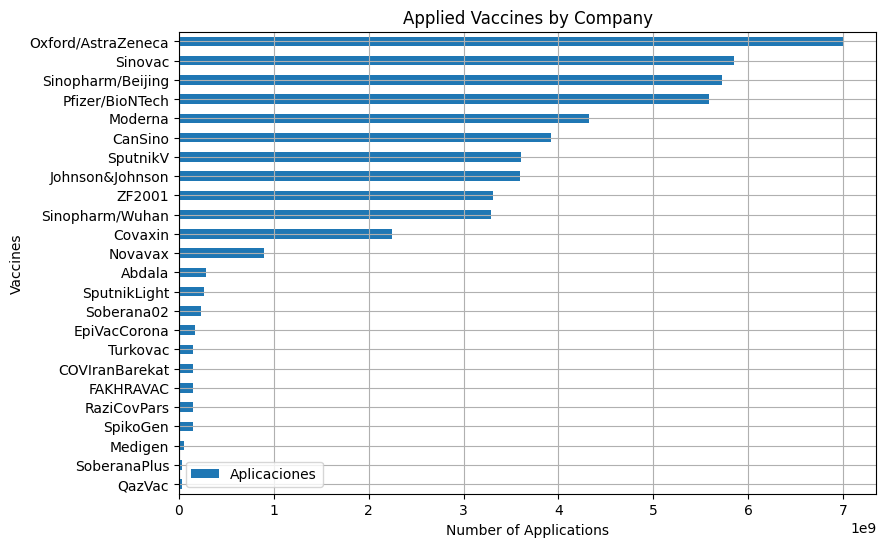

In [6]:
''' Creating columns within the Countries Dataframe to identify vaccines companies '''
# Calculating the cumulative of applied vaccines on each of the presented countries
df_cntr_summary = df_cntrs.groupby(['country', 'vaccines'])[['total_vaccinations']].max().reset_index()
# Creating the variable to store the vaccines to identity
vaccines = list(set(','.join(df_cntrs.vaccines.str.replace(' ', '')).split(',')))

# Identifying the occurrences of vaccines applications for the cases of interest
Vaccines_dict = {}
for vaccine in vaccines:
    Vaccines_dict[vaccine] = []

for index, row in df_cntr_summary.iterrows():
    for vaccine in vaccines:
        if vaccine in row['vaccines'].replace(' ', ''):
            Vaccines_dict[vaccine].append(1)
        else:
            Vaccines_dict[vaccine].append(0)

# Adding the identified cases to the countries dataframe
for col in vaccines:
    df_cntr_summary[col] = Vaccines_dict[col]

''' Finding the amount of total vaccines applied by companies '''

# Creating varibales to store the data of interest
Vaccines_dict = {}
Applied_Vaccines = []

# Retrieving the amount of application for each of the vaccines of interest
for vaccine in vaccines:  
    n = -1
    val = df_cntr_summary[(df_cntr_summary[vaccine]==1)].total_vaccinations.sum()
    Applied_Vaccines.append(val)

# Calculating the percentages of the applied vaccines with respect to whole vaccines universe
Percentages =  Applied_Vaccines/sum(Applied_Vaccines)

'''Plotting the found results'''

fig, axs = plt.subplots(1,1 ,figsize=(9,6))
ax = axs
A = pd.DataFrame({'Vacunas':vaccines, 'Aplicaciones':Applied_Vaccines}).sort_values('Aplicaciones', ascending=True)
display(A.sort_values('Aplicaciones', ascending=False))
A.plot.barh(x='Vacunas', y='Aplicaciones', ax=ax)
ax.set_title('Applied Vaccines by Company')
ax.set_xlabel('Number of Applications')
ax.set_ylabel('Vaccines')
ax.grid()

- ***Para el caso del archivo country_vaccinations_manufactures***

  Para este caso se calcularon el número de vacunas aplicas por compañía al agrupar el dataframe en cuestión por *location* y *vaccine*, encontrando el valor máximo para grupo creado que representan el numero acumulado de cada una de las vacunas manufacturadas por las farmacéuticas.

,vaccine,total_vaccinations
0,Pfizer/BioNTech,1830468893
1,Moderna,558181628
2,Oxford/AstraZeneca,207101555
3,Sinopharm/Beijing,72810196
4,Johnson&Johnson,68837424
5,Sinovac,60528625
6,Sputnik V,24095884
7,CanSino,1721864
8,Novavax,422365
9,Covaxin,22


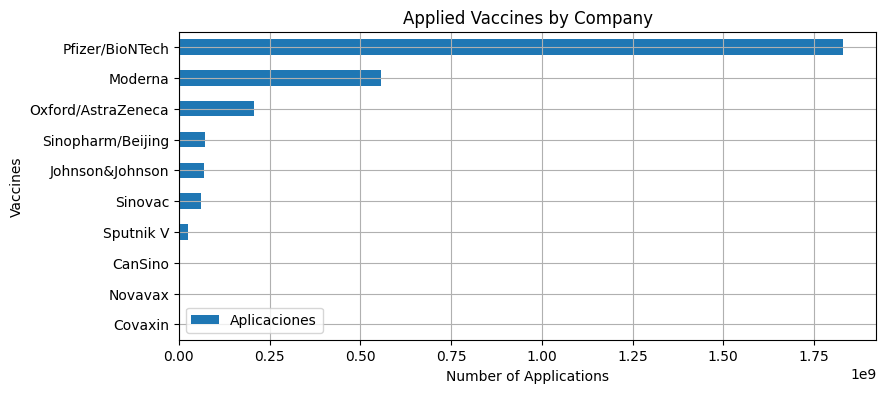

In [7]:
df_mfrs_grp = df_mfrs.groupby(['location', 'vaccine'])[['total_vaccinations']].max().reset_index()
df_tmp = df_mfrs_grp.groupby('vaccine')[['total_vaccinations']].sum().sort_values('total_vaccinations', ascending=False).reset_index()
display(df_tmp)

fig, axs = plt.subplots(1,1 ,figsize=(9,4))
ax = axs
A = pd.DataFrame({'Vacunas':df_tmp.vaccine.tolist(), 'Aplicaciones':df_tmp.total_vaccinations.tolist()}).sort_values('Aplicaciones', ascending=True)
A.plot.barh(x='Vacunas', y='Aplicaciones', ax=ax)
ax.set_title('Applied Vaccines by Company')
ax.set_xlabel('Number of Applications')
ax.set_ylabel('Vaccines')
ax.grid()

#### - **d.-** *Obtener la cantidad de vacunas aplicadas en todo el mundo*  

Para este caso se usaron los cálculos encontrados en la subsección previa, para cada uno de los casos de interés. El número de vacunas aplicadas en todo e mundo se calculó sumando la aplicación de vacunas por locación y vacuna, para ambos casos de interés.

In [8]:
# Calculating the amount of applied vaccines worldwide, for both file cases
pd.DataFrame({'File':['country_vaccinations.csv', 'country_vaccinations_by_manufacturer.csv'], 
                      'Vaccunas_Aplicadas':[df_cntr_summary.total_vaccinations.sum(), df_mfrs_grp.total_vaccinations.sum()]})

,File,Vaccunas_Aplicadas
0,country_vaccinations.csv,1.138344e+10
1,country_vaccinations_by_manufacturer.csv,2.824168e+09


#### - **e.-** *Calcular el promedio de vacunas aplicadas por país*  

El promedio de vacunas aplicas por país, para ambos casos de interés, se calcularon al hacer el promedio de las sumas de aplicación de vacunas para los grupos generados en la subsección anterior. Con ello se logró primero calcular el número de vacunas por locación, y después calcular el promedio de vacunas por país, al promediar la suma de todos los grupos encontrados en los dataframes.

In [9]:
'''Displaying the average number of applied vaccines per country'''
# Calculating the amount of applied vaccines worldwide, for both file cases
pd.DataFrame({'File':['country_vaccinations.csv', 'country_vaccinations_by_manufacturer.csv'], 
                      'Vaccunas_Aplicadas':[df_cntr_summary.total_vaccinations.mean(), df_mfrs_grp.groupby('location')[['total_vaccinations']].sum().mean().values[0]]})

,File,Vaccunas_Aplicadas
0,country_vaccinations.csv,5.104682e+07
1,country_vaccinations_by_manufacturer.csv,6.567834e+07


#### - **f.-** *Determinar la cantidad de vacunas aplicadas el día 29/01/21 en todo el mundo*  

Para ello se filtraron los datos, para cada uno de los casos de interés, para extraer información relacionada con la fecha de interés. Entonces, para el caso del archivo *country_vaccinations*, se sumaron los casos de vacunas aplicadas por día, *daily_vaccinations*, para las fechas resultantes después del filtro. Por otro lado, para el caso del archivo *country_vaccinations_by_manufacturer*, dado que no se encuentra conformado por una columna que nos diga el número de vacunas aplicadas por día, se procedió a encontrar la diferencia entre el acumulado de vacunas aplicadas el 2021-01-02 y un día antes, para obtener el número de vacunas aplicadas en el día de interés.

In [10]:
'''Displaying the average number of applied vaccines on a specific date'''
# Calculating the amount of applied vaccines worldwide, for both file cases
df_ctr_date = df_cntrs[df_cntrs.date==('2021-01-21')][['date', 'country', 'vaccines', 'daily_vaccinations_raw', 'daily_vaccinations']]

fecha1 = '2021-01-21'
fecha2 = '2021-01-20'

A = df_mfrs[df_mfrs.date==(fecha1)]
B = df_mfrs[df_mfrs.date==(fecha2)]
col_name = 'vaccines_applied_on_{}'.format(fecha1)
vacunas = []

for index, row in A.iterrows():
    vacunas.append(row['total_vaccinations']-B[(B.location==row['location']) & (B.vaccine==row['vaccine'])]['total_vaccinations'].values[0])
    
pd.DataFrame({'File':['country_vaccinations.csv', 'country_vaccinations_by_manufacturer.csv'], 
                      'Vaccunas_Aplicadas':[df_ctr_date.daily_vaccinations.sum(),sum(vacunas)]})

,File,Vaccunas_Aplicadas
0,country_vaccinations.csv,3846182.0
1,country_vaccinations_by_manufacturer.csv,1780371.0


#### - **g.-** *Crear un dataframe nuevo denominado conDiferencias que contenga los datos originales y una columna derivada (diferencias) con las diferencias de aplicación entre las columnas daily_vaccionations y daily_vaccionations_raw*  

In [11]:
df_conDiferencias = df_cntrs.copy()
df_conDiferencias['diferencias'] = np.absolute((df_conDiferencias.daily_vaccinations-df_conDiferencias.daily_vaccinations_raw).values)
df_conDiferencias.date = df_conDiferencias.date.dt.date

display(df_conDiferencias[['country', 'vaccines', 'total_vaccinations', 'daily_vaccinations_raw', 'daily_vaccinations', 'diferencias']].sample(10))

,country,vaccines,total_vaccinations,daily_vaccinations_raw,daily_vaccinations,diferencias
84536,Vietnam,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...",138772562.0,1197953.0,929446.0,268507.0
9046,Bhutan,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",479686.0,7.0,165.0,158.0
56975,Nigeria,Oxford/AstraZeneca,NaN,NaN,64847.0,NaN
81105,Ukraine,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",3051.0,1713.0,1446.0,267.0
71739,Solomon Islands,Oxford/AstraZeneca,NaN,NaN,680.0,NaN
73325,South Sudan,"Johnson&Johnson, Oxford/AstraZeneca",NaN,NaN,1638.0,NaN
50901,Monaco,Pfizer/BioNTech,NaN,NaN,295.0,NaN
16808,Comoros,"Covaxin, Oxford/AstraZeneca, Sinopharm/Beijing",NaN,NaN,4406.0,NaN
78460,Tonga,Oxford/AstraZeneca,NaN,NaN,240.0,NaN
77574,Timor,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",NaN,NaN,1472.0,NaN


#### - **h.-** *Obtener el periodo de tiempo entre el registro con fecha más reciente y el registro con fecha más antigua*  

In [12]:
# Obeniendo las fehcas iniciales y finales de los registros asociados a los daframes de interes
fechas_dfcnrts = df_cntrs.sort_values('date', ascending=True).date.values[[0, -1]]
fechas_dmfrs = df_mfrs.sort_values('date', ascending=True).date.values[[0, -1]]

# Desplegando los rangos de fechas
pd.DataFrame({'File':['country_vaccinations.csv', 'country_vaccinations_by_manufacturer.csv'],
              'Fecha_i':[fechas_dfcnrts[0], fechas_dmfrs[0]], 'Fecha_f':[fechas_dfcnrts[1], fechas_dmfrs[1]],
              'Periodo (dias)':[int((fechas_dfcnrts[1] - fechas_dfcnrts[0]) / np.timedelta64(1, 'D')),
                                int((fechas_dmfrs[1] - fechas_dmfrs[0]) / np.timedelta64(1, 'D'))]})

,File,Fecha_i,Fecha_f,Periodo (dias)
0,country_vaccinations.csv,2020-12-02,2022-03-29,482
1,country_vaccinations_by_manufacturer.csv,2020-12-04,2022-03-30,481


#### - **i.-** *Crear un dataframe nuevo denominado conCantidad que contenga los datos originales y una columna derivada (canVac) con la cantidad de vacunas utilizadas cada día (usar la columna vaccines y separar por el carácter , ). *  

In [13]:
# Separando cadenas de textos contenidas en la columna vaccines y determinando el nuermo de elementos para cada cadena
Used_Vaccines = []
for n in df_cntrs.vaccines.str.replace(' ', '').str.split(','):
    Used_Vaccines.append(len(n))

# Creando el dataframe conCantidad como es requerido
df_conCantidad = df_cntrs.copy()
df_conCantidad['canVac'] = Used_Vaccines
df_conCantidad.date = df_conCantidad.date.dt.date
display(df_conCantidad[['country', 'date', 'total_vaccinations', 'daily_vaccinations', 'vaccines', 'canVac']].sample(10))

,country,date,total_vaccinations,daily_vaccinations,vaccines,canVac
5499,Bahamas,2021-09-29,NaN,2381.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",3
46069,Luxembourg,2021-04-09,126970.0,3450.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",4
43477,Latvia,2021-11-29,2263303.0,9802.0,"Johnson&Johnson, Moderna, Novavax, Pfizer/BioN...",4
29405,Germany,2022-03-03,170403481.0,92163.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",5
45290,Liechtenstein,2021-08-22,42166.0,175.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",3
35589,India,2021-08-20,573205464.0,5287937.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",3
81435,Ukraine,2022-01-22,29829551.0,68637.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",5
6208,Bangladesh,2021-04-11,6010824.0,73236.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",6
75589,Switzerland,2021-06-29,7474412.0,70297.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",3
81875,United Arab Emirates,2022-02-16,23911863.0,22330.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",5


#### - **j.-** *Generar un dataframe denominado antes20 con todos los registros que se hayan realizado antes del 20 de diciembre de 2020*  

In [14]:
# Filtrando informacion por la fecha requerida,y creando el dataframe de interes
df_antes20 = df_cntrs.copy()
df_antes20 = df_antes20[df_antes20.date<'2020-12-20']
df_antes20.date = df_antes20.date.dt.date

display(df_antes20[['country', 'date', 'total_vaccinations', 'daily_vaccinations']].sample(10))

,country,date,total_vaccinations,daily_vaccinations
13405,Canada,2020-12-16,3025.0,1510.0
82363,United States,2020-12-16,244549.0,71420.0
58521,Norway,2020-12-06,0.0,0.0
43129,Latvia,2020-12-16,5.0,0.0
64110,Russia,2020-12-15,28500.0,NaN
20829,Denmark,2020-12-11,2.0,0.0
13406,Canada,2020-12-17,7279.0,2425.0
13403,Canada,2020-12-14,5.0,NaN
20836,Denmark,2020-12-18,6.0,1.0
58527,Norway,2020-12-12,11.0,2.0


#### - **k.-** *Obtener un dataframe denominado pfizer con todos los registros donde se haya utilizado la vacuna Pfizer*  

In [15]:
''' Creando columnas asociadas con las vacunas a filrar '''
df_pfizer = df_cntrs.copy()
# Creating the variable to store the vaccines to identity
vaccines = list(set(','.join(df_pfizer.vaccines.str.replace(' ', '')).split(',')))

# Identifying the occurrences of vaccines applications for the cases of interest
Vaccines_dict = {}
for vaccine in vaccines:
    Vaccines_dict[vaccine] = []

for index, row in df_pfizer.iterrows():
    for vaccine in vaccines:
        if vaccine in row['vaccines'].replace(' ', ''):
            Vaccines_dict[vaccine].append(1)
        else:
            Vaccines_dict[vaccine].append(0)

# Adding the identified cases to the countries dataframe
for col in vaccines:
    df_pfizer[col] = Vaccines_dict[col]

df_pfizer.date = df_pfizer.date.dt.date

display(df_pfizer[df_pfizer['Pfizer/BioNTech']==1][['country', 'date', 'total_vaccinations', 'vaccines', 'Pfizer/BioNTech']].sample(10))

,country,date,total_vaccinations,vaccines,Pfizer/BioNTech
66832,San Marino,2022-01-10,NaN,"Pfizer/BioNTech, Sputnik V",1
39861,Jersey,2021-09-30,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",1
9281,Bhutan,2021-12-16,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",1
70789,Slovakia,2021-08-28,NaN,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",1
32331,Guinea,2021-03-26,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",1
8716,Bermuda,2021-05-30,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",1
10985,Brazil,2021-12-19,324846680.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",1
23093,Egypt,2021-08-18,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",1
83390,Uzbekistan,2021-09-10,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",1
59846,Pakistan,2022-03-06,NaN,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,...",1


#### - **l.-** *l. Almacenar los dataframes generados (conDiferencias, conCantidad, antes20 y pfizer) en un archivo de Excel denominado resultadosReto.xlsx, donde cada dataframe ocupe una hoja diferente. Se recomienda ver la documentación de pd.ExcelWriter*  

In [16]:
# determining the name of the file
file_name = 'resultadosReto.xlsx'
path2save = os.path.join(os.getcwd(), 'Results', file_name)

cols = [['country', 'date', 'total_vaccinations', 'vaccines', 'daily_vaccinations_raw', 'daily_vaccinations', 'diferencias'],
        ['country', 'date', 'total_vaccinations', 'daily_vaccinations', 'vaccines', 'canVac'],
        ['country', 'date', 'total_vaccinations', 'daily_vaccinations', 'vaccines'],
        ['country', 'date', 'total_vaccinations', 'vaccines', 'Pfizer/BioNTech']]

# creating an ExcelWriter object
with pd.ExcelWriter(path2save) as writer:
        # writing to the 'Employee' sheet
    df_conDiferencias[cols[0]].to_excel(writer, sheet_name='Diferenccias', index=False)
    df_conCantidad[cols[1]].to_excel(writer, sheet_name='Vant_Vacunas', index=False)
    df_antes20[cols[2]].to_excel(writer, sheet_name='Prev_201220', index=False)
    df_pfizer[cols[3]].to_excel(writer, sheet_name='Pzifer', index=False)

# FIN